## Analysis of Epinions Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned Epinions sub-dataset that is different from the one in Portfolio 1. 

### Import Cleaned Epinions Dataset
The csv file named 'Epinions_cleaned_data_portfolio_2.csv'is provided. Please import the csv file (i.e., 'Epinions_cleaned_data_portfolio_2') and print out its total length.

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [58]:
dataframe = pd.read_csv("Epinions_cleaned_data_portfolio_2.csv")

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating (positive or negative). Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [59]:
dataframe.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies


In [60]:
from sklearn.preprocessing import OrdinalEncoder 

ord_enc = OrdinalEncoder(dtype = int)
ord_enc

OrdinalEncoder(dtype=<class 'int'>)

In [61]:
dataframe.columns.tolist()

['userId',
 'timestamp',
 'review',
 'item',
 'rating',
 'helpfulness',
 'gender',
 'category']

In [62]:
dataframe["category_code"] = ord_enc.fit_transform(dataframe[["category"]])
dataframe["gender_code"] = ord_enc.fit_transform(dataframe[["gender"]])
dataframe["review_code"] = ord_enc.fit_transform(dataframe[["review"]])
dataframe.columns.tolist()

['userId',
 'timestamp',
 'review',
 'item',
 'rating',
 'helpfulness',
 'gender',
 'category',
 'category_code',
 'gender_code',
 'review_code']

In [63]:
corr_category = dataframe["category_code"].corr(dataframe["rating"])
corr_category

-0.14057638180137574

In [64]:
corr_gender = dataframe["gender_code"].corr(dataframe["rating"])
corr_gender

0.018105039011507486

In [65]:
corr_review = dataframe["review_code"].corr(dataframe["rating"])
corr_review

-0.062071079458250855

In [66]:
corr_helpfulness = dataframe["helpfulness"].corr(dataframe["rating"])
corr_helpfulness

-0.016832209821488652

1. rating is relatively more correlated with the category and review;
2. rating is relatively less correlated with the helpfulness and gender;
3. overall, the rating is not highly correlated with the four features, as the correlation values are quite small

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [67]:
train_case1, test_case1 = train_test_split(dataframe, test_size = 0.9, random_state = 142)

In [68]:
train_case1.shape

(289, 11)

In [69]:
test_case1.shape

(2610, 11)

In [70]:
#Case 2
train_case2, test_case2 = train_test_split(dataframe, test_size = 0.9, random_state = 142)

In [71]:
train_case2.shape

(289, 11)

In [72]:
test_case2.shape

(2610, 11)

### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select __two most correlated features and two least correlated features__ regarding rating, respectively. 
* Train __four__ linear regression models by following the conditions:
    - (model-a) using the training/testing data in __case 1__ with __two most__ correlated input features
    - (model-b) using the training/testing data in __case 1__ with __two least__ correlated input features
    - (model-c) using the training/testing data in __case 2__ with __two most__ correlated input features
    - (model-d) using the training/testing data in __case 2__ with __two least__ correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [73]:
reg_1M = linear_model.LinearRegression()
reg_1M

LinearRegression()

In [74]:
X_train_1M = train_case1[["category_code", "review_code"]]
y_train_1M = train_case1["rating"]

X_test_1M = test_case1[["category_code", "review_code" ]]
y_test_1M = test_case1["rating"]

In [75]:
reg_1M.fit(X_train_1M, y_train_1M)

LinearRegression()

In [76]:
reg_1L = linear_model.LinearRegression()
reg_1L

LinearRegression()

In [77]:
X_train_1L = train_case1[["gender_code", "helpfulness"]]
y_train_1L = train_case1["rating"]

X_test_1L = test_case1[["gender_code", "helpfulness" ]]
y_test_1L = test_case1["rating"]

In [78]:
reg_1L.fit(X_train_1L, y_train_1L)

LinearRegression()

In [79]:
reg_2M = linear_model.LinearRegression()
reg_2M

LinearRegression()

In [80]:
X_train_2M = train_case1[["category_code", "review_code"]]
y_train_2M = train_case1["rating"]

X_test_2M = test_case1[["category_code", "review_code" ]]
y_test_2M = test_case1["rating"]

In [81]:
reg_2M.fit(X_train_2M, y_train_2M)

LinearRegression()

In [82]:
reg_2L = linear_model.LinearRegression()
reg_2L

LinearRegression()

In [83]:
X_train_2L = train_case1[["gender_code", "helpfulness"]]
y_train_2L = train_case1["rating"]

X_test_2L = test_case1[["gender_code", "helpfulness" ]]
y_test_2L = test_case1["rating"]

In [84]:
reg_2L.fit(X_train_2L, y_train_2L)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [92]:
predicted_1M = reg_1M.predict(X_test_1M)
predicted_1M

array([4.18029442, 3.84895812, 3.46675839, ..., 3.79832263, 3.69740316,
       4.14209896])

In [93]:
predicted_1M = reg_1M.predict(X_test_1M)
mse_1M = mean_squared_error(predicted_1M, y_test_1M)
rmse_1M = np.sqrt(mse_1M)

print("reg_1M MSE:", mse_1M)
print("reg_1M Root MSE:", rmse_1M)

reg_1M MSE: 1.7661060021271924
reg_1M Root MSE: 1.3289492097620557


In [94]:
predicted_2L = reg_2L.predict(X_test_2L)
mse_2L = mean_squared_error(predicted_2L, y_test_2L)
rmse_2L = np.sqrt(mse_2L)

print("reg_2ML MSE:", mse_2L)
print("reg_2L Root MSE:", rmse_2L)

reg_2ML MSE: 1.8142164061736321
reg_2L Root MSE: 1.3469285081895148


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [95]:
dataframe_mse = pd.DataFrame({"mse": [mse_1M, mse_1L, mse_2M, mse_2L]},
                index = ["reg_1M", "reg_1L", "reg_2M", "reg_2L"])
dataframe_mse

,mse
reg_1M,1.766106
reg_1L,1.766106
reg_2M,1.766106
reg_2L,1.814216


<BarContainer object of 4 artists>

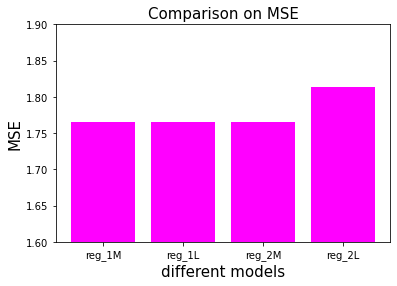

In [101]:
plt.ylim(1.6, 1.9)
plt.xlabel("different models", size = 15)
plt.ylabel("MSE", size = 15)
plt.title("Comparison on MSE", size = 15)

plt.bar(data = dataframe_mse, height = "mse", x = ["reg_1M", "reg_1L", "reg_2M", "reg_2L"], color = "magenta")

In [103]:
dataframe_rmse = pd.DataFrame({"rmse": [rmse_1M, rmse_1L, rmse_2M, rmse_2L]}, index = ["reg_1M", "reg_1L", "reg_2M", "reg_2L"])
                               
dataframe_rmse
                               

,rmse
reg_1M,1.328949
reg_1L,1.328949
reg_2M,1.328949
reg_2L,1.346929


<BarContainer object of 4 artists>

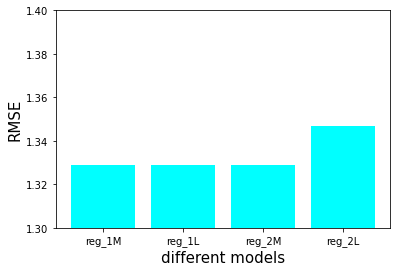

In [107]:
plt.ylim(1.3, 1.4)
plt.xlabel("different models", size = 15)
plt.ylabel("RMSE", size = 15)

plt.bar(data = dataframe_rmse, height = "rmse", x = ["reg_1M", "reg_1L", "reg_2M", "reg_2L"], color = "cyan")